In [1]:
#!pip install openpyxl
#!pip install plotly
#!pip install seaborn
#!pip install scikit-learn
import plotly.express as px 
import pandas as pd 
import numpy as np 
import random 
import openpyxl 
import some_module as sm 
import seaborn as sns 
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr

from some_module import PI, f, g
from datetime import datetime, time, date 

In [2]:
df202104_202305 = pd.read_csv('20240129152139_방한 외래관광객 성별.csv', encoding='cp949')
df_main = pd.read_csv('aaaaa.csv')
df_pur = pd.read_csv('Data_pupose.csv')

In [3]:
df_main

,년월,목적,연령,성별,국적,지역,입국항,교통수단,인원
0,202001,공용,21-30,여성,스페인,구 주,인천공항,공항,4
1,202001,공용,1-10,여성,필리핀,아시아주,인천공항,공항,4
2,202001,공용,41-50,남성,네 팔,아시아주,인천공항,공항,3
3,202001,공용,51-60,남성,뉴질랜드,대양주,인천공항,공항,2
4,202001,공용,61-70,남성,크로아티아,구 주,인천공항,공항,1
...,...,...,...,...,...,...,...,...,...
51810,202103,기타,51-60,남성,프랑스,구 주,인천공항,공항,3
51811,202103,기타,71-,여성,러시아(연방),구 주,인천공항,공항,7
51812,202103,기타,41-50,남성,캄보디아,아시아주,인천공항,공항,6
51813,202103,기타,승무원,승무원,그루지아,구 주,인 천,항구,2


In [4]:
df202104_202305

,기준일자,주요국가대륙명,국가명,성별,인원,전년동기,증감률
0,202104,대륙전체,연도,남성,23842.0,11655.0,104.6
1,202104,대륙전체,연도,여성,11620.0,8534.0,36.2
2,202104,대륙전체,연도,승무원,34650.0,9226.0,275.6
3,202104,대륙전체,연도,전체,70112.0,29415.0,138.4
4,202104,아시아,연도대륙,남성,17787.0,8721.0,104.0
...,...,...,...,...,...,...,...
7071,202305,교포,교포,전체,3867.0,2244.0,72.3
7072,총계,총계,NaN,남성,3066340.0,732661.0,318.5
7073,총계,총계,NaN,여성,3270804.0,432579.0,656.1
7074,총계,총계,NaN,승무원,1099451.0,861923.0,27.6


In [5]:
df202104_202305.rename(columns={'기준일자':'년월', '주요국가대륙명':'지역','국가명':'국적'}, inplace=True)

In [6]:
df202104_202305.drop(df202104_202305.iloc[0:4,:].index, inplace=True)

In [7]:
df202104_202305 = df202104_202305[:-4]

In [8]:
df202104_202305

,년월,지역,국적,성별,인원,전년동기,증감률
4,202104,아시아,연도대륙,남성,17787.0,8721.0,104.0
5,202104,아시아,연도대륙,여성,7267.0,6135.0,18.5
6,202104,아시아,연도대륙,승무원,18820.0,2260.0,732.7
7,202104,아시아,연도대륙,전체,43874.0,17116.0,156.3
8,202104,아시아,중국,남성,8081.0,2238.0,261.1
...,...,...,...,...,...,...,...
7067,202305,교포,연도대륙,전체,3867.0,2244.0,72.3
7068,202305,교포,교포,남성,1615.0,1019.0,58.5
7069,202305,교포,교포,여성,2252.0,1225.0,83.8
7070,202305,교포,교포,승무원,0.0,0.0,0.0


In [9]:
df202104_202305 = df202104_202305.where(df202104_202305['지역'] != '대륙전체', df202104_202305.drop(columns='지역',axis=0))
df202104_202305 = df202104_202305.where(df202104_202305['국적'] != '연도대륙', df202104_202305.drop(columns='국적',axis=0))
df202104_202305 = df202104_202305.where(df202104_202305['성별'] != '전체', df202104_202305.drop(columns='성별',axis=0))

In [10]:
df202104_202305.dropna(inplace=True)

In [11]:
df202104_202305

,년월,지역,국적,성별,인원,전년동기,증감률
8,202104,아시아,중국,남성,8081.0,2238.0,261.1
9,202104,아시아,중국,여성,5172.0,1621.0,219.1
10,202104,아시아,중국,승무원,3577.0,76.0,4606.6
12,202104,아시아,일본,남성,649.0,165.0,293.3
13,202104,아시아,일본,여성,165.0,155.0,6.5
...,...,...,...,...,...,...,...
7061,202305,기타,기타,여성,2.0,5.0,-60.0
7062,202305,기타,기타,승무원,2.0,3.0,-33.3
7068,202305,교포,교포,남성,1615.0,1019.0,58.5
7069,202305,교포,교포,여성,2252.0,1225.0,83.8


In [12]:
df_inner = pd.concat([df_main,df202104_202305],join='inner')
df_inner

,년월,성별,국적,지역,인원
0,202001,여성,스페인,구 주,4.0
1,202001,여성,필리핀,아시아주,4.0
2,202001,남성,네 팔,아시아주,3.0
3,202001,남성,뉴질랜드,대양주,2.0
4,202001,남성,크로아티아,구 주,1.0
...,...,...,...,...,...
7061,202305,여성,기타,기타,2.0
7062,202305,승무원,기타,기타,2.0
7068,202305,남성,교포,교포,1615.0
7069,202305,여성,교포,교포,2252.0


In [13]:
df_outer = pd.concat([df_main,df202104_202305],join='outer')
df_outer

,년월,목적,연령,성별,국적,지역,입국항,교통수단,인원,전년동기,증감률
0,202001,공용,21-30,여성,스페인,구 주,인천공항,공항,4.0,NaN,NaN
1,202001,공용,1-10,여성,필리핀,아시아주,인천공항,공항,4.0,NaN,NaN
2,202001,공용,41-50,남성,네 팔,아시아주,인천공항,공항,3.0,NaN,NaN
3,202001,공용,51-60,남성,뉴질랜드,대양주,인천공항,공항,2.0,NaN,NaN
4,202001,공용,61-70,남성,크로아티아,구 주,인천공항,공항,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7061,202305,NaN,NaN,여성,기타,기타,NaN,NaN,2.0,5.0,-60.0
7062,202305,NaN,NaN,승무원,기타,기타,NaN,NaN,2.0,3.0,-33.3
7068,202305,NaN,NaN,남성,교포,교포,NaN,NaN,1615.0,1019.0,58.5
7069,202305,NaN,NaN,여성,교포,교포,NaN,NaN,2252.0,1225.0,83.8


In [14]:
df_gr = df_inner.groupby('년월', as_index=False)[['성별','인원']].value_counts()
df_gr

,년월,성별,인원,count
0,202001,남성,1.0,1756
1,202001,여성,1.0,1257
2,202001,남성,2.0,750
3,202001,여성,2.0,535
4,202001,남성,3.0,439
...,...,...,...,...
9984,202305,승무원,111.0,1
9985,202305,승무원,109.0,1
9986,202305,승무원,104.0,1
9987,202305,승무원,76.0,1


In [15]:
df_gr['년월']=pd.to_datetime(df_gr['년월'],format='%Y%m')


In [16]:
df_gr = df_gr.set_index('년월')
df_gr

,성별,인원,count
년월,,,
2020-01-01,남성,1.0,1756
2020-01-01,여성,1.0,1257
2020-01-01,남성,2.0,750
2020-01-01,여성,2.0,535
2020-01-01,남성,3.0,439
...,...,...,...
2023-05-01,승무원,111.0,1
2023-05-01,승무원,109.0,1
2023-05-01,승무원,104.0,1


C:\Users\admin\AppData\Local\Temp\ipykernel_13300\411709540.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


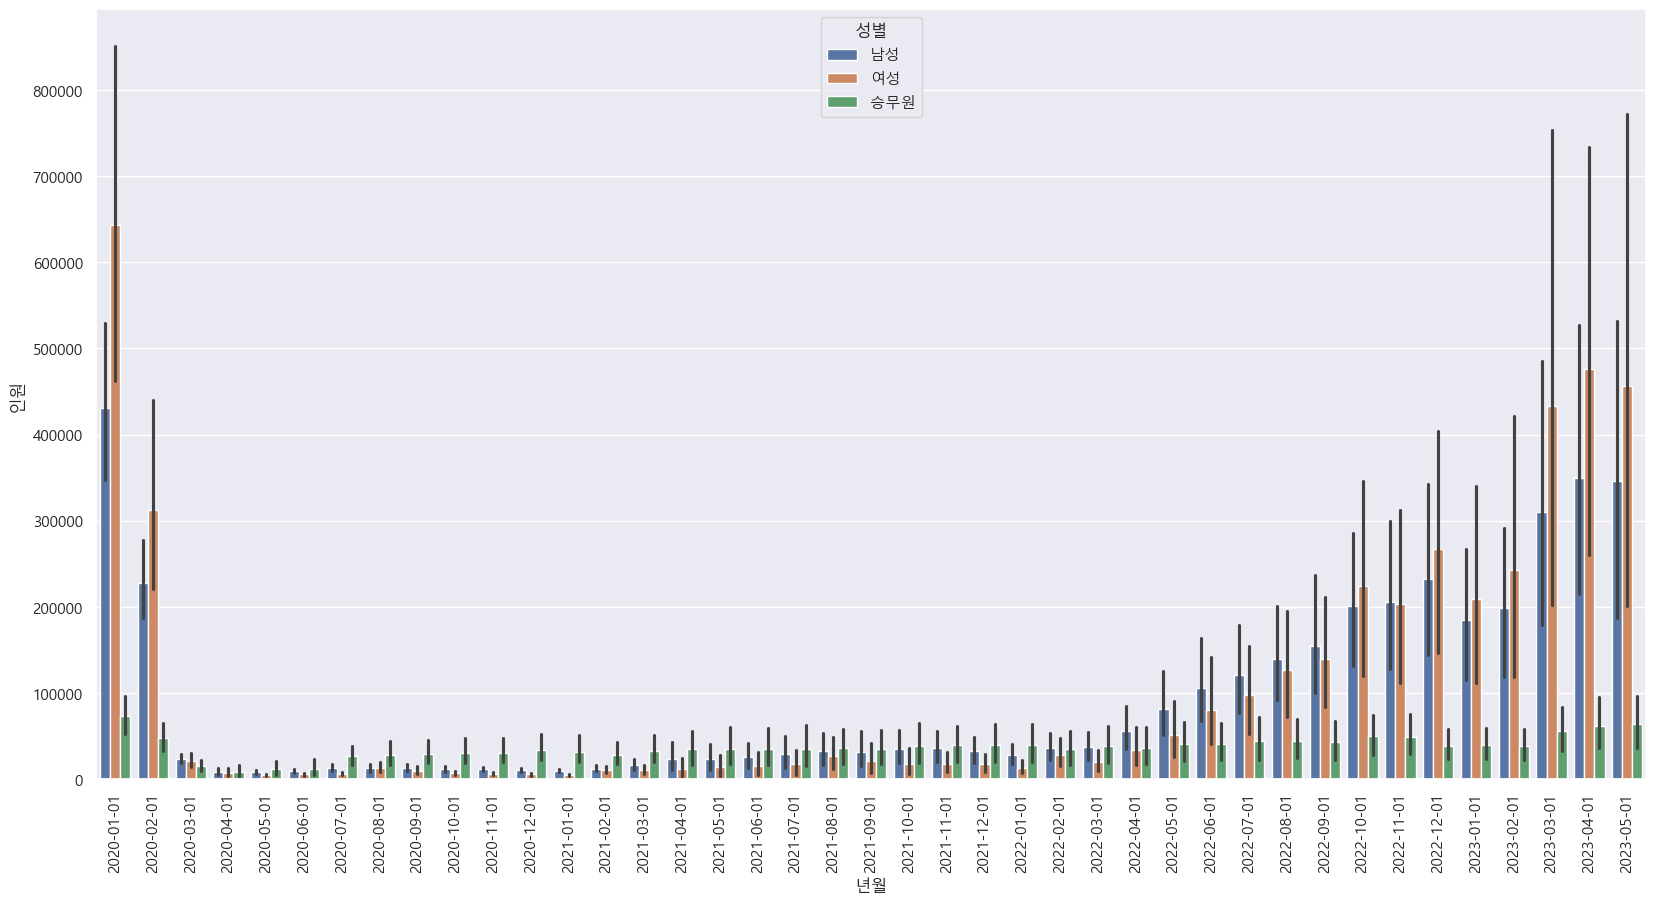

In [17]:
fig = plt.figure(figsize=(20,10))
sns.set(font='Malgun Gothic')
g = sns.barplot(data=df_gr, x='년월', y='인원', hue='성별', estimator='sum')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [18]:
df1 = df_gr.loc['2023-03-01',:].groupby(['년월','성별']).agg({'인원':'sum'})
df1 = df1.reset_index('성별')
df1.iloc[2,1] - df1.iloc[0,1] 


122885.0

In [19]:
df_pur

,년월,목적,연령,성별,국적,지역,입국항,교통수단,인원,전년동기,증감률
0,202001,공용,21-30,여성,스페인,구 주,인천공항,공항,4.0,NaN,NaN
1,202001,공용,1-10,여성,필리핀,아시아주,인천공항,공항,4.0,NaN,NaN
2,202001,공용,41-50,남성,네 팔,아시아주,인천공항,공항,3.0,NaN,NaN
3,202001,공용,51-60,남성,뉴질랜드,대양주,인천공항,공항,2.0,NaN,NaN
4,202001,공용,61-70,남성,크로아티아,구 주,인천공항,공항,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
59610,202305,관광,NaN,NaN,교포,교포,NaN,NaN,0.0,0.0,0
59611,202305,상용,NaN,NaN,교포,교포,NaN,NaN,0.0,0.0,0
59612,202305,공용,NaN,NaN,교포,교포,NaN,NaN,0.0,0.0,0
59613,202305,유학연수,NaN,NaN,교포,교포,NaN,NaN,0.0,0.0,0


In [20]:
df_pur1 = df_pur.groupby(['년월'], as_index=False)[['목적','인원']].value_counts()
df_pur1['년월'] = pd.to_datetime(df_pur1['년월'], format='%Y%m')
df_pur1

,년월,목적,인원,count
0,2020-01-01,관광,1.0,1397
1,2020-01-01,기타,1.0,848
2,2020-01-01,관광,2.0,603
3,2020-01-01,기타,2.0,381
4,2020-01-01,관광,3.0,355
...,...,...,...,...
11742,2023-05-01,기타,2065.0,1
11743,2023-05-01,기타,1747.0,1
11744,2023-05-01,기타,1561.0,1
11745,2023-05-01,기타,1531.0,1


In [21]:
df_pur1.set_index('년월', inplace=True)

<Axes: xlabel='년월', ylabel='인원'>

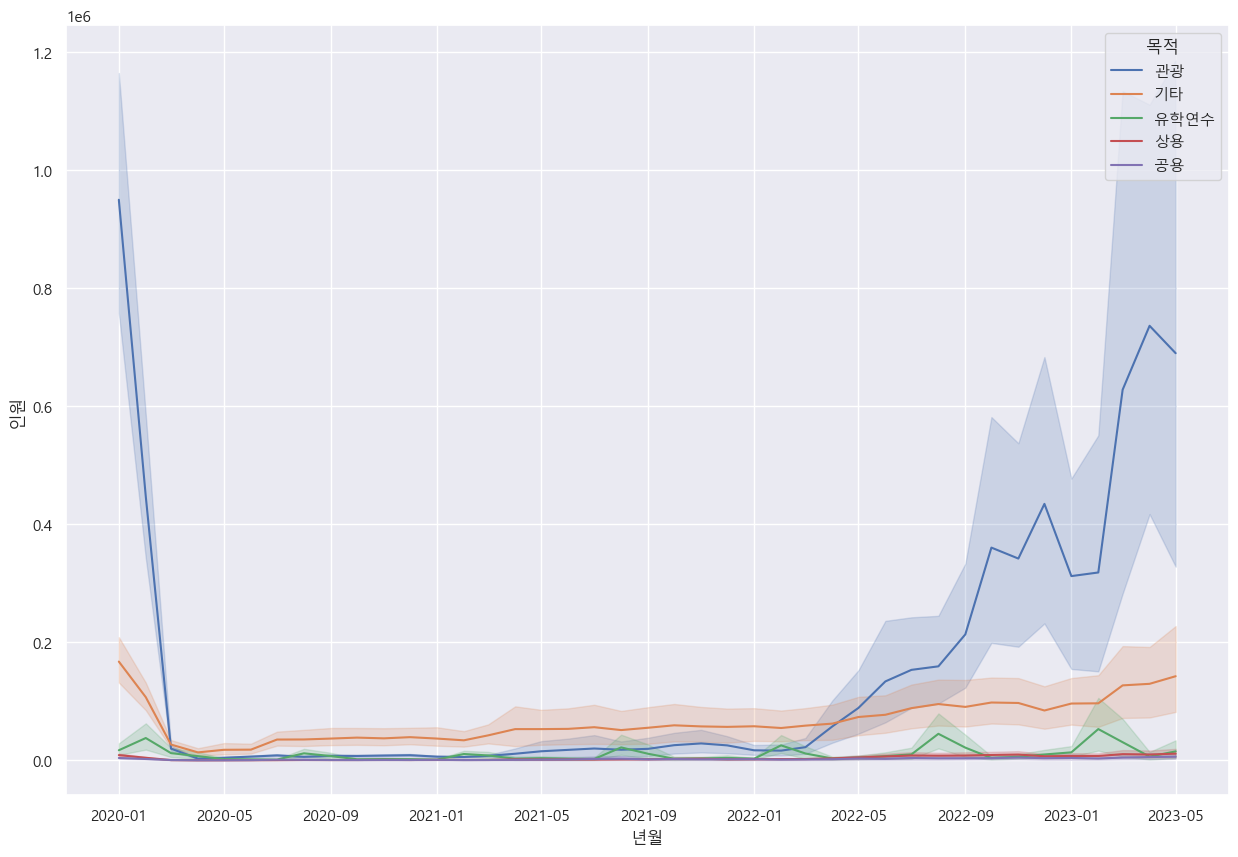

In [22]:
df_pur1
fig = plt.figure(figsize=(15,10))
sns.lineplot(data=df_pur1 , x='년월', y='인원', hue='목적', estimator='sum')

In [23]:
df_pur2 = df_pur.groupby(['년월'], as_index=False)[['성별','인원']].value_counts()
df_pur2['년월'] = pd.to_datetime(df_pur2['년월'], format='%Y%m')
df_pur2

,년월,성별,인원,count
0,2020-01-01,남성,1.0,1756
1,2020-01-01,여성,1.0,1257
2,2020-01-01,남성,2.0,750
3,2020-01-01,여성,2.0,535
4,2020-01-01,남성,3.0,439
...,...,...,...,...
5602,2021-03-01,남성,146.0,1
5603,2021-03-01,남성,165.0,1
5604,2021-03-01,남성,204.0,1
5605,2021-03-01,남성,235.0,1


<Axes: xlabel='년월', ylabel='인원'>

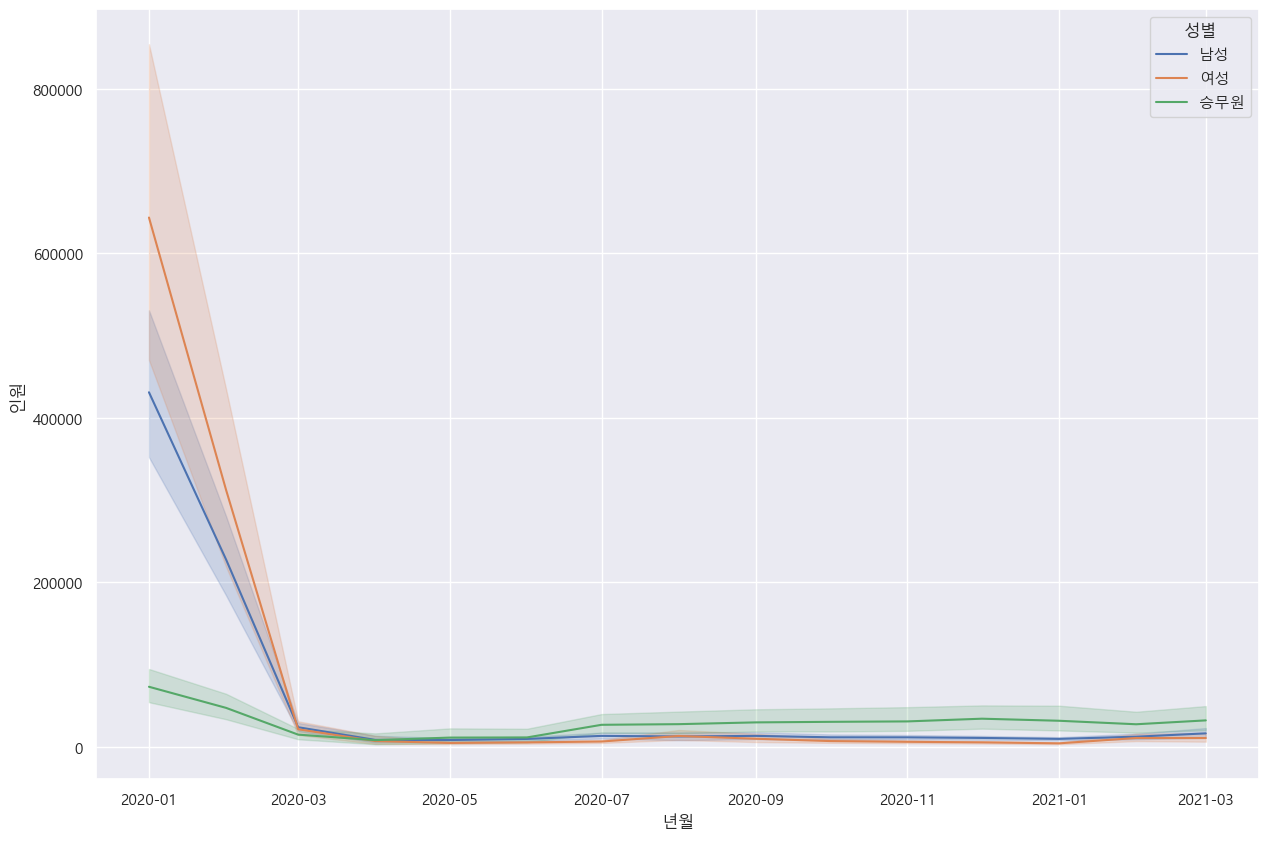

In [24]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(data=df_pur2 , x='년월', y='인원', hue='성별', estimator='sum')

In [25]:
df_trip = pd.read_csv('1인_평균_지출_경비90일_이하_20240130142812.csv')
df_trip

,통계분류(1),통계분류(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
0,통계분류(1),통계분류(2),사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균
1,전체,소계,3976,5.4,12.3,17.9,30.9,27.4,6.2,4217.03,16525,11,24.1,24.8,24.3,12.6,3.1,3046.6
2,월별,1월,153,13.1,17.6,19,26.8,19,4.6,3530.56,333,6.6,13.2,17.1,27.9,29.1,6,4238
3,월별,2월,126,10.3,16.7,11.9,37.3,22.2,1.6,3934.34,418,3.3,14.6,20.8,28.7,27.5,5,4258.5
4,월별,3월,191,5.2,7.3,8.9,40.8,29.8,7.9,4719.21,561,2.7,16.8,26.7,31,17.6,5.2,3665.5
5,월별,4월,257,6.2,10.1,10.5,27.6,34.6,10.9,4763.24,1171,4.3,22.8,26.7,27.8,16,2.4,3404.7
6,월별,5월,280,4.3,12.1,17.9,32.5,27.5,5.7,4225.53,1880,4.4,18,25.6,31.5,15.1,5.4,3458.9
7,월별,6월,255,4.3,12.9,16.1,28.6,31.4,6.7,4356.77,1389,6.8,19.1,27.6,26.4,15.3,4.8,3348.1
8,월별,7월,246,2.4,9.8,20.3,27.2,33.7,6.5,4653.71,1650,6.8,15.6,27.7,30.5,16.2,3.2,3430.6
9,월별,8월,356,3.7,14.3,23.9,32,22.2,3.9,3907.13,1735,9.3,19,26.1,30.2,12.9,2.6,3138


In [26]:
#col_list = df_trip.iloc[0,:].str.extract('([\w]*)')
#col_list = col_list.reset_index()
#col_list = col_list.drop(columns=['index'], axis=True)
#col_list = col_list.values.tolist()
#col_list

#col_mapping = {old_col: new_col for old_col, new_col in zip(df_trip.columns, col_list)}
old_list = ['통계분류(1)', '통계분류(2)', '2021', '2021.1', '2021.2', '2021.3', '2021.4', '2021.5', '2021.6', '2021.7', '2022', '2022.1', '2022.2', '2022.3', '2022.4', '2022.5', '2022.6', '2022.7']
new_list = ['통계분류(1)', '통계분류(2)', '사례수', '1000달러 이하', '1000달러초과 2000달러이하', '2000달러초과 3000달러이하', '3000달러초과 5000달러이하', '5000달러초과 10000달러이하', '최대금액 초과자', '평균', '사례수', '1000달러 이하', '1000달러초과 2000달러이하', '2000달러초과 3000달러이하', '3000달러초과 5000달러이하', '5000달러초과 10000달러이하', '최대금액 초과자', '평균']
column_mapping = dict(zip(old_list, new_list))

df_trip=df_trip.rename(columns=column_mapping)
df_trip
df_trip.drop(index=0, axis=0, inplace=True)



In [27]:
df_trip_monthly_2021 = df_trip.iloc[1:13,:10]
df_trip_monthly_2021.drop(columns='통계분류(1)', axis=1, inplace=True)
df_trip_monthly_2021.rename(columns={'통계분류(2)':'2021월별'}, inplace=True)
df_trip_monthly_2021

,2021월별,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균
2,1월,153,13.1,17.6,19,26.8,19,4.6,3530.56
3,2월,126,10.3,16.7,11.9,37.3,22.2,1.6,3934.34
4,3월,191,5.2,7.3,8.9,40.8,29.8,7.9,4719.21
5,4월,257,6.2,10.1,10.5,27.6,34.6,10.9,4763.24
6,5월,280,4.3,12.1,17.9,32.5,27.5,5.7,4225.53
7,6월,255,4.3,12.9,16.1,28.6,31.4,6.7,4356.77
8,7월,246,2.4,9.8,20.3,27.2,33.7,6.5,4653.71
9,8월,356,3.7,14.3,23.9,32,22.2,3.9,3907.13
10,9월,306,3.3,14.4,21.2,34.3,21.2,5.6,4085.34
11,10월,526,4.8,13.1,20.2,29.8,27,5.1,4130.33


In [28]:
month = df_trip_monthly_2021[['2021월별']]
month = month.rename(columns={'2021월별': '2022월별'})

In [29]:
df_trip_monthly_2022 = df_trip.iloc[1:13,10:]
df_trip_monthly_2022 = month.join(df_trip_monthly_2022, how='left')
df_trip_monthly_2022 

,2022월별,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균
2,1월,333,6.6,13.2,17.1,27.9,29.1,6,4238
3,2월,418,3.3,14.6,20.8,28.7,27.5,5,4258.5
4,3월,561,2.7,16.8,26.7,31,17.6,5.2,3665.5
5,4월,1171,4.3,22.8,26.7,27.8,16,2.4,3404.7
6,5월,1880,4.4,18,25.6,31.5,15.1,5.4,3458.9
7,6월,1389,6.8,19.1,27.6,26.4,15.3,4.8,3348.1
8,7월,1650,6.8,15.6,27.7,30.5,16.2,3.2,3430.6
9,8월,1735,9.3,19,26.1,30.2,12.9,2.6,3138
10,9월,1942,12.5,24.6,27.5,23.9,8.6,2.9,2890.4
11,10월,2000,17.8,32.1,24.7,17.4,6.9,1.3,2471.2


In [30]:
df_trip_monthly_2021.set_index('2021월별', inplace=True)
df_trip_monthly_2021=df_trip_monthly_2021.astype('float')

In [31]:
df_trip_monthly_2021.drop(columns=['사례수','평균'], axis=1, inplace=True)

<Axes: xlabel='2021월별'>

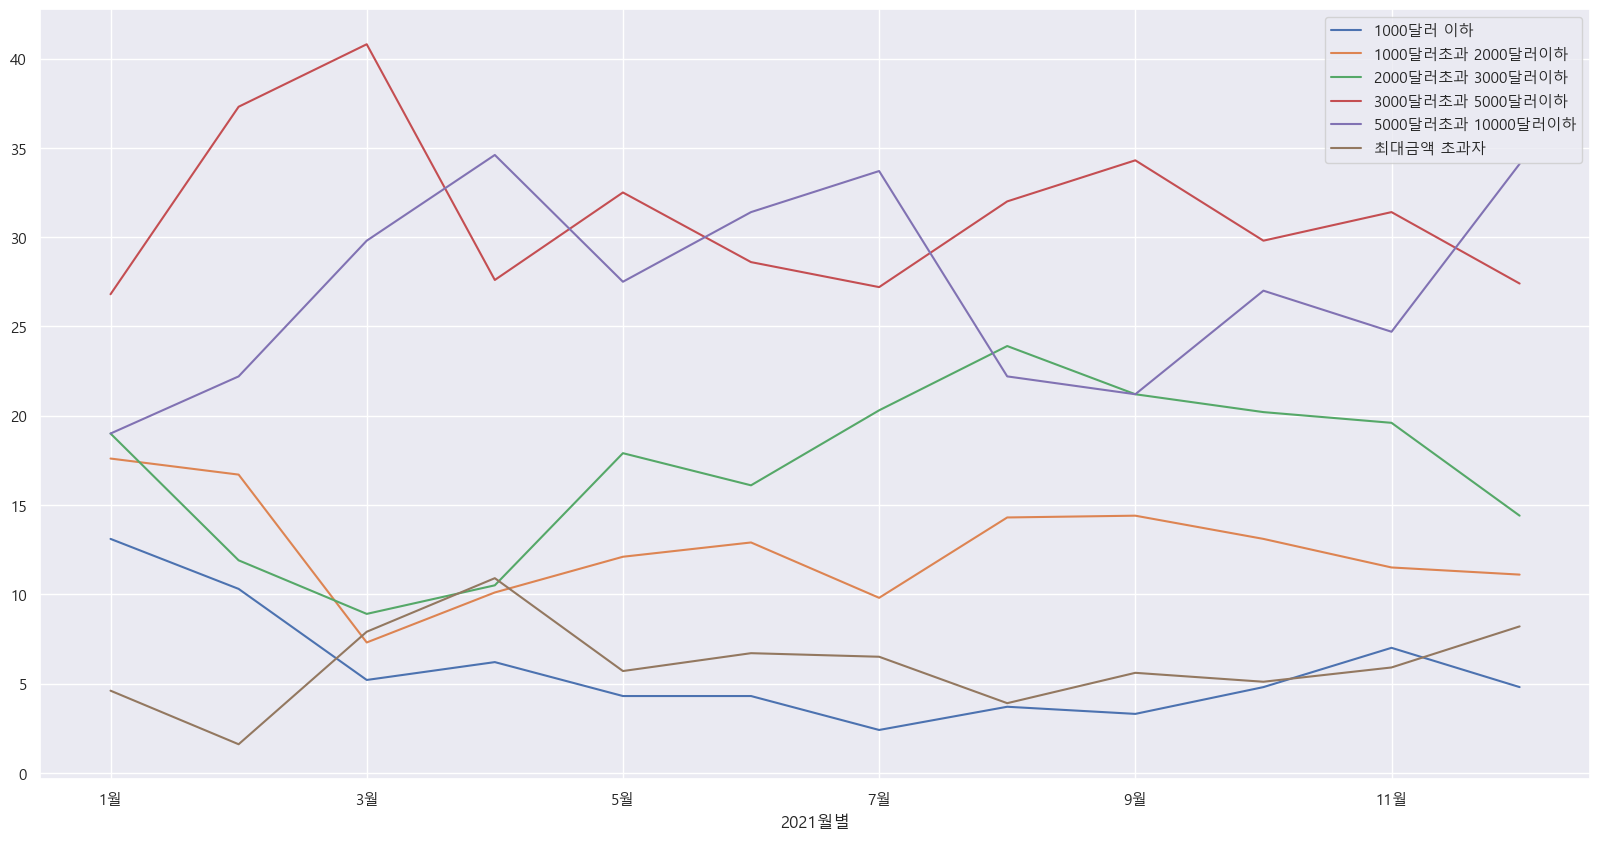

In [32]:
df_trip_monthly_2021.plot(kind='line',figsize=(20,10))

In [33]:
df_trip_monthly_2022.set_index('2022월별', inplace=True)
df_trip_monthly_2022=df_trip_monthly_2022.astype('float')

In [34]:
df_trip_monthly_2022.drop(columns=['사례수','평균'], axis=1, inplace=True)

<Axes: xlabel='2022월별'>

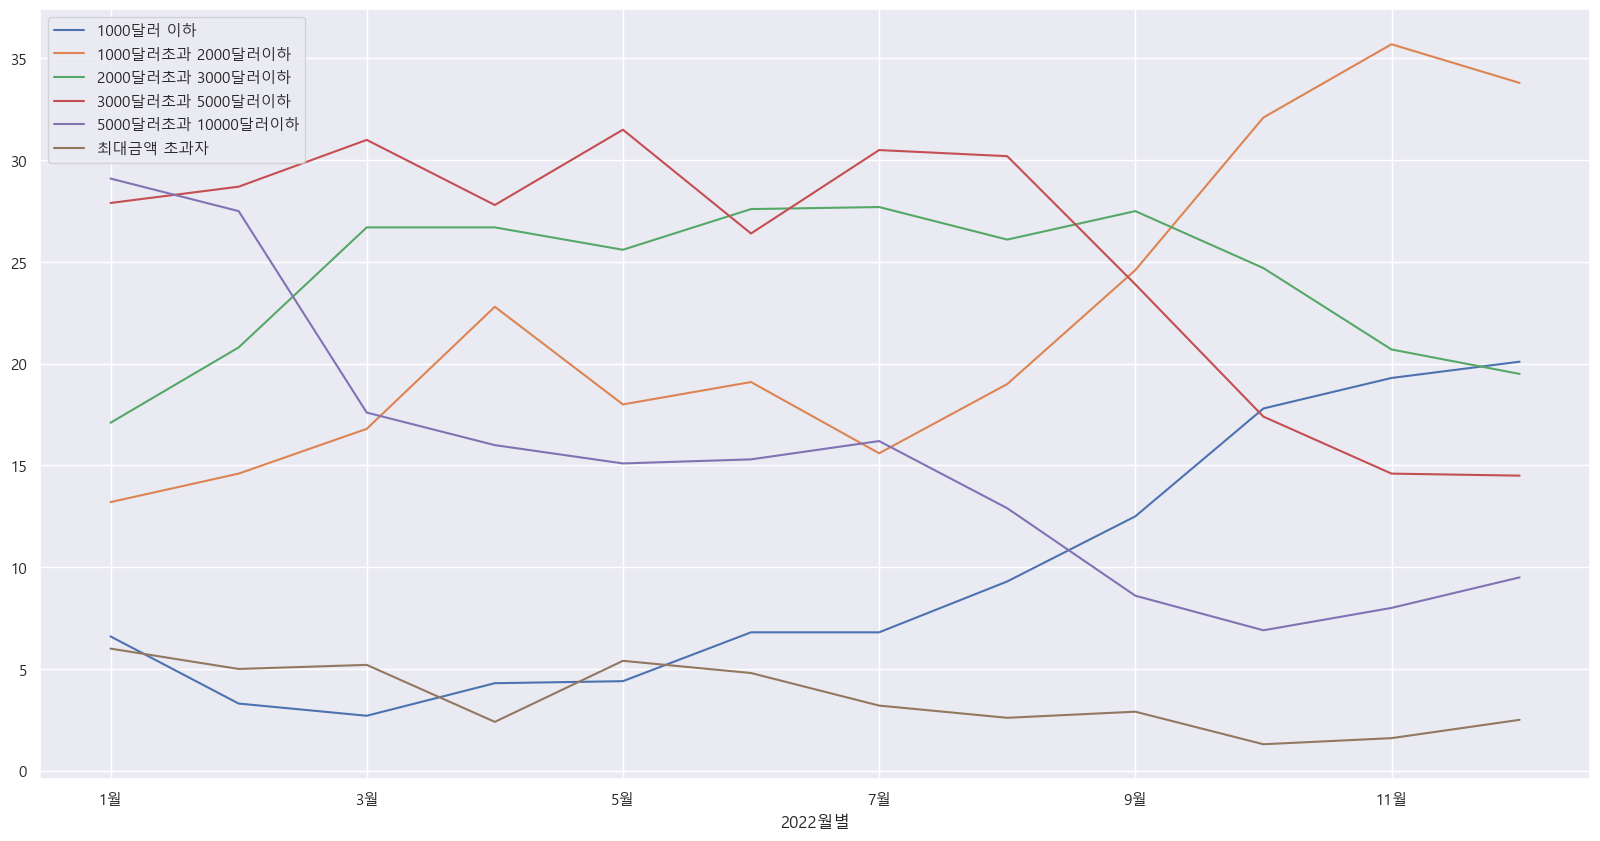

In [35]:
df_trip_monthly_2022.plot(kind='line',figsize=(20,10))

In [36]:
df_trip_tot = df_trip.iloc[[0],:]

df_trip_tot=df_trip_tot.drop(columns=['통계분류(1)','통계분류(2)'], axis=1)
df_trip_tot2021 = df_trip_tot.iloc[[0], 0:8]
df_trip_tot2021 = df_trip_tot2021.astype('float')
df_trip_tot2021

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균
1,3976.0,5.4,12.3,17.9,30.9,27.4,6.2,4217.03


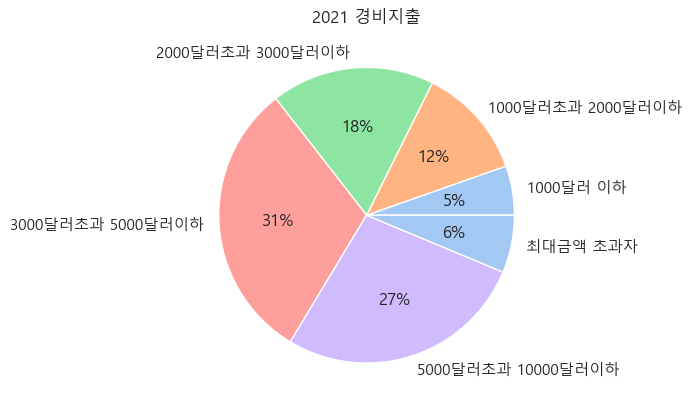

In [37]:
#define data
data = [5.4, 12.3, 17.9, 30.9,27.4, 6.3]
labels = ['1000달러 이하', '1000달러초과 2000달러이하', '2000달러초과 3000달러이하', '3000달러초과 5000달러이하', '5000달러초과 10000달러이하', '최대금액 초과자']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('2021 경비지출')
plt.show()

In [38]:
df_trip_tot2022 = df_trip_tot.iloc[[0], 8:]
df_trip_tot2022 = df_trip_tot2022.astype('float')
df_trip_tot2022

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균
1,16525.0,11.0,24.1,24.8,24.3,12.6,3.1,3046.6


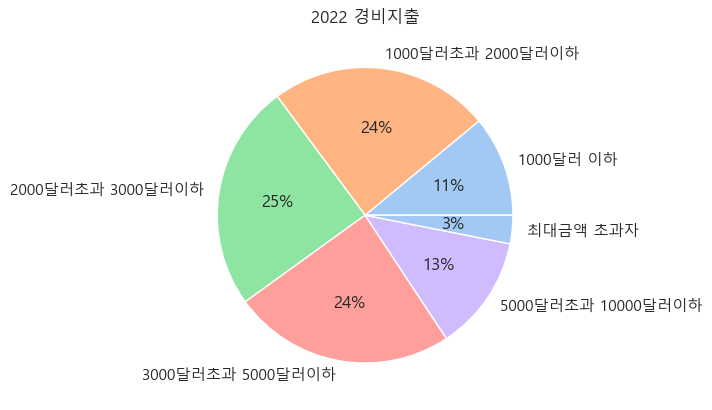

In [39]:
#define data
data = [11, 24.1, 24.8, 24.3, 12.6, 3.1]
labels = ['1000달러 이하', '1000달러초과 2000달러이하', '2000달러초과 3000달러이하', '3000달러초과 5000달러이하', '5000달러초과 10000달러이하', '최대금액 초과자']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('2022 경비지출')
plt.show()

In [40]:
df_trip_gender = df_trip.iloc[38:40,:]
df_trip_gender = df_trip_gender.drop(columns=['통계분류(1)','통계분류(2)'], axis=1)
df_trip_gender2021 = df_trip_gender.iloc[:, 0:8]
df_trip_gender2021 = df_trip_gender2021.astype('float')
df_trip_gender2021

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균
39,2775.0,5.8,11.0,15.9,31.0,29.9,6.5,4346.45
40,1201.0,4.6,15.2,22.4,30.6,21.7,5.5,3921.02


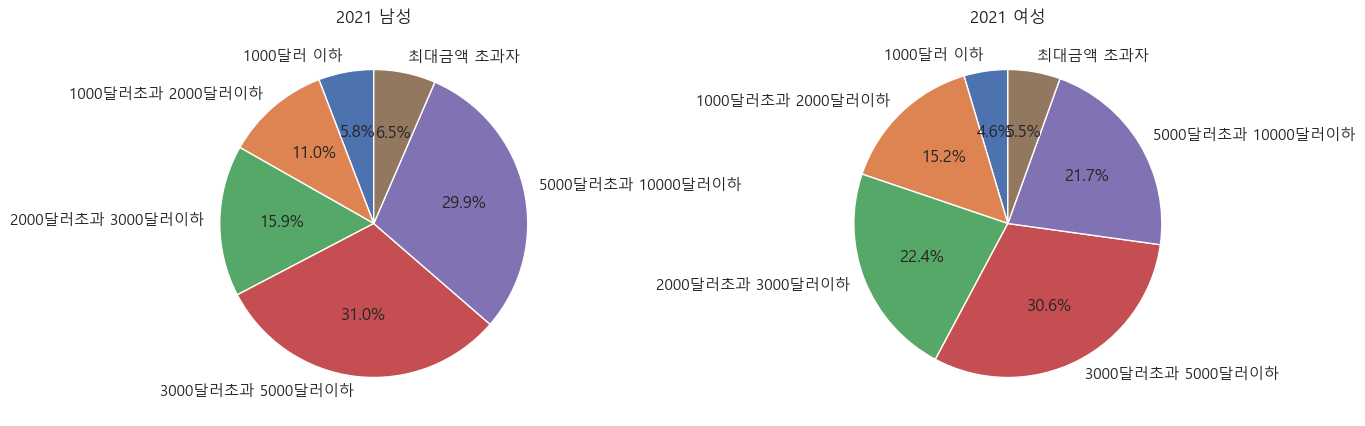

In [41]:
# Sample data
data1 = [5.8, 11.0, 15.9,31.0,29.9,6.5]  # replace with your data
data2 = [4.6, 15.2, 22.4,30.6,21.7,5.5]  # replace with your data
labels = ['1000달러 이하', '1000달러초과 2000달러이하', '2000달러초과 3000달러이하', '3000달러초과 5000달러이하', '5000달러초과 10000달러이하', '최대금액 초과자']
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first pie chart
axes[0].pie(data1, labels=labels, autopct="%1.1f%%", startangle=90)
axes[0].set_title("2021 남성")

# Plot the second pie chart
axes[1].pie(data2, labels=labels, autopct="%1.1f%%", startangle=90)
axes[1].set_title("2021 여성")

plt.show()

In [42]:
df_trip_gender2022 = df_trip_gender.iloc[:, 8:]
df_trip_gender2022 = df_trip_gender2022.astype('float')
df_trip_gender2022

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균
39,8249.0,8.5,20.7,24.6,26.9,15.6,3.8,3333.8
40,8276.0,13.6,27.5,25.1,21.7,9.7,2.4,2764.6


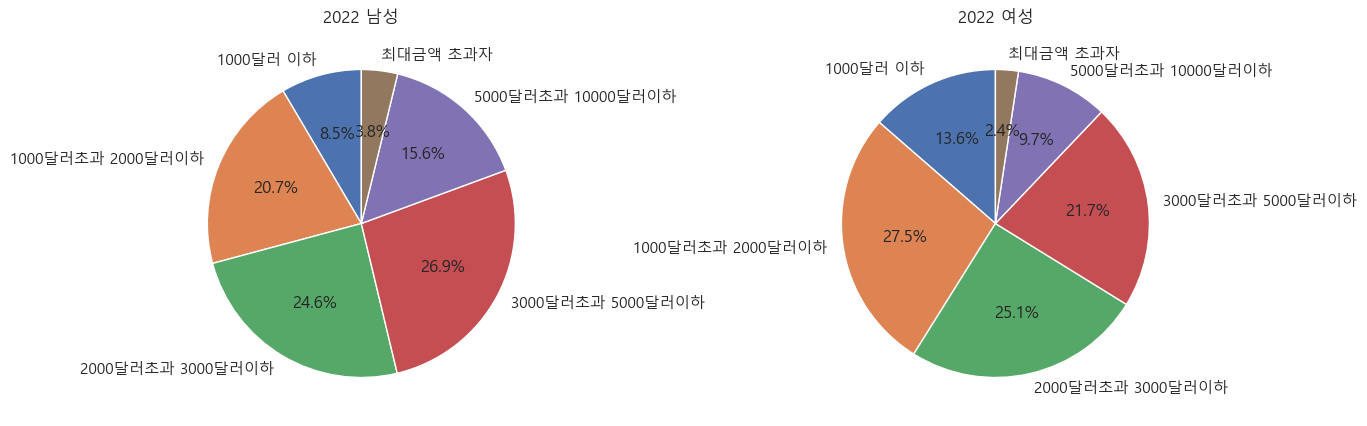

In [43]:
data1 = [8.5, 20.7, 24.6,26.9,15.6,3.8]  # replace with your data
data2 = [13.6, 27.5, 25.1,21.7,9.7,2.4]  # replace with your data
labels = ['1000달러 이하', '1000달러초과 2000달러이하', '2000달러초과 3000달러이하', '3000달러초과 5000달러이하', '5000달러초과 10000달러이하', '최대금액 초과자']
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first pie chart
axes[0].pie(data1, labels=labels, autopct="%1.1f%%", startangle=90)
axes[0].set_title("2022 남성")

# Plot the second pie chart
axes[1].pie(data2, labels=labels, autopct="%1.1f%%", startangle=90)
axes[1].set_title("2022 여성")

plt.show()

In [44]:
df_trip_age = df_trip.iloc[40:46,:]
df_trip_age = df_trip_age.drop(columns=['통계분류(1)'], axis=1)
df_trip_age = df_trip_age.rename(columns={'통계분류(2)': '2021 나이'})
df_trip_age = df_trip_age.set_index('2021 나이')
df_trip_age2021 = df_trip_age.iloc[:, 0:8]
df_trip_age2021 = df_trip_age2021.astype('float')
df_trip_age2021

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,평균
2021 나이,,,,,,,,
15~20세,167.0,3.6,11.4,16.8,32.3,29.9,6.0,4424.88
21~30세,1154.0,4.5,12.2,17.9,29.7,27.6,8.1,4245.80
31~40세,1165.0,5.7,13.0,18.7,31.1,26.3,5.3,4121.42
41~50세,761.0,6.0,11.7,18.8,31.4,27.2,4.9,4171.24
51~60세,550.0,5.1,11.5,15.6,32.2,30.2,5.5,4434.80
61세 이상,179.0,9.5,14.0,16.8,29.1,23.5,7.3,3989.44


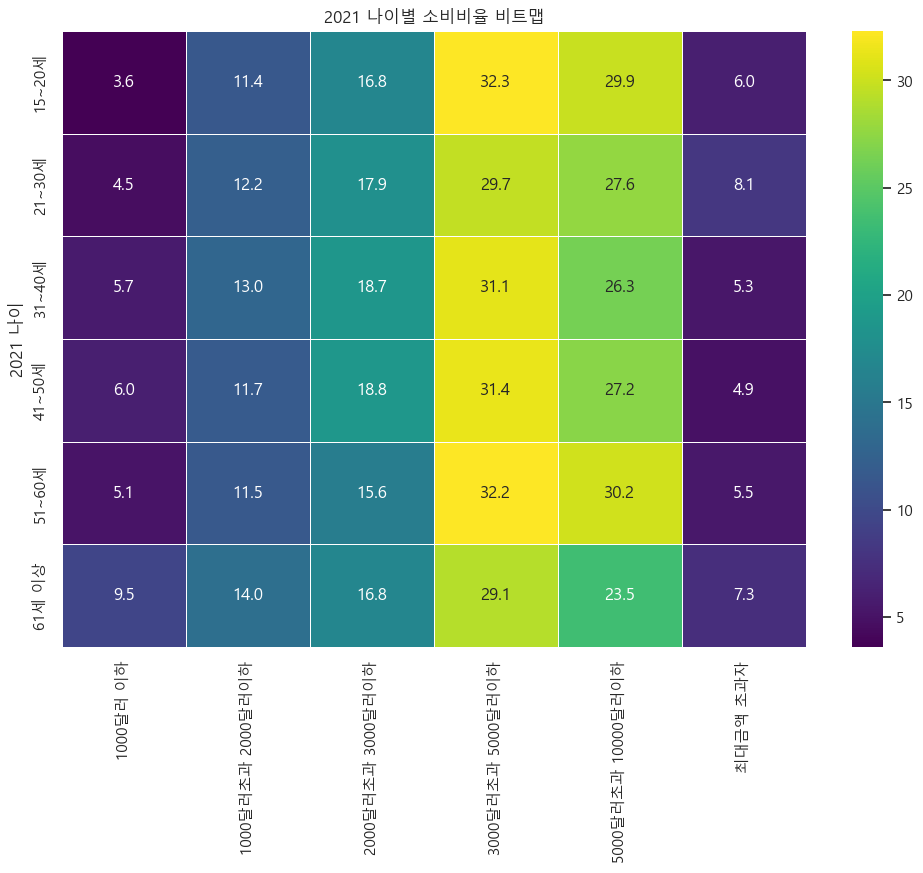

In [45]:
df2 = df_trip_age2021.iloc[0:,1:7]
plt.figure(figsize=(12, 8))
sns.heatmap(df2, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('2021 나이별 소비비율 비트맵')
plt.show()

In [46]:
df_trip_age = df_trip.iloc[40:46,:]
df_trip_age = df_trip_age.drop(columns=['통계분류(1)'], axis=1)
df_trip_age = df_trip_age.rename(columns={'통계분류(2)': '2022 나이'})
df_trip_age = df_trip_age.set_index('2022 나이')
df_trip_age2022 = df_trip_age.iloc[:, 8:]
df_trip_age2022 = df_trip_age2022.astype('float')
df1 = df_trip_age2022.iloc[0:,1:7]
df1

,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자
2022 나이,,,,,,
15~20세,9.5,26.7,26.7,20.6,13.7,2.8
21~30세,13.1,25.7,26.1,22.8,9.8,2.6
31~40세,11.6,23.7,25.0,24.0,12.9,2.9
41~50세,9.0,22.1,24.4,26.1,14.5,3.8
51~60세,8.5,22.6,21.8,26.6,16.3,4.1
61세 이상,8.6,22.5,21.5,28.6,15.2,3.7


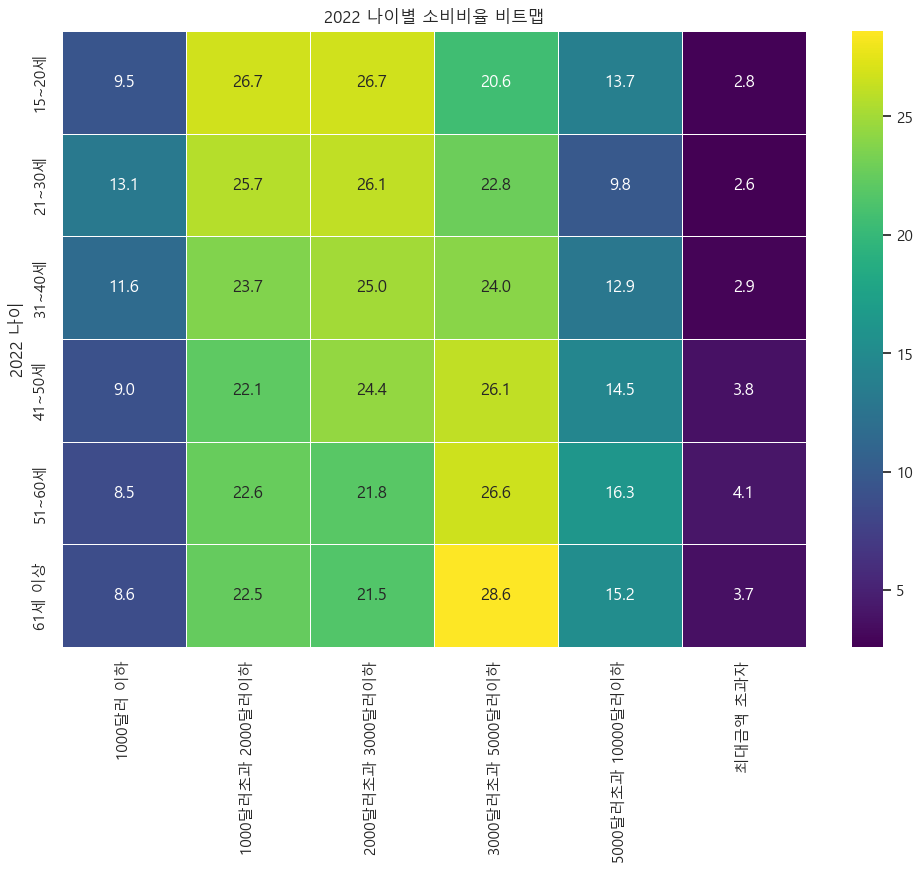

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1, annot=True, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('2022 나이별 소비비율 비트맵')
plt.show()

In [48]:
df_trip_obj = df_trip.iloc[46:52,:]
df_trip_obj  = df_trip_obj .drop(columns=['통계분류(1)'], axis=1)
df_trip_obj  = df_trip_obj .rename(columns={'통계분류(2)': '2021 방한목적'})
df_trip_obj  = df_trip_obj .set_index('2021 방한목적')
df_trip_obj2021  = df_trip_obj .iloc[:, :8]
df_trip_obj2021 = df_trip_obj2021.astype('float')
df_trip_obj2021 = df_trip_obj2021.iloc[0:,1:7]
df_trip_obj2021

,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자
2021 방한목적,,,,,,
여가/위락/휴식,5.9,14.1,34.4,29.6,13.0,3.0
친구/친지방문,6.2,23.4,26.1,28.4,13.4,2.4
사업 또는 전문 활동,5.4,10.1,14.7,30.9,31.8,7.2
교육,2.6,8.3,13.3,34.7,33.6,7.4
종교 및 순례,0.0,12.5,12.5,12.5,50.0,12.5
기타,10.9,6.9,19.8,33.7,20.8,7.9


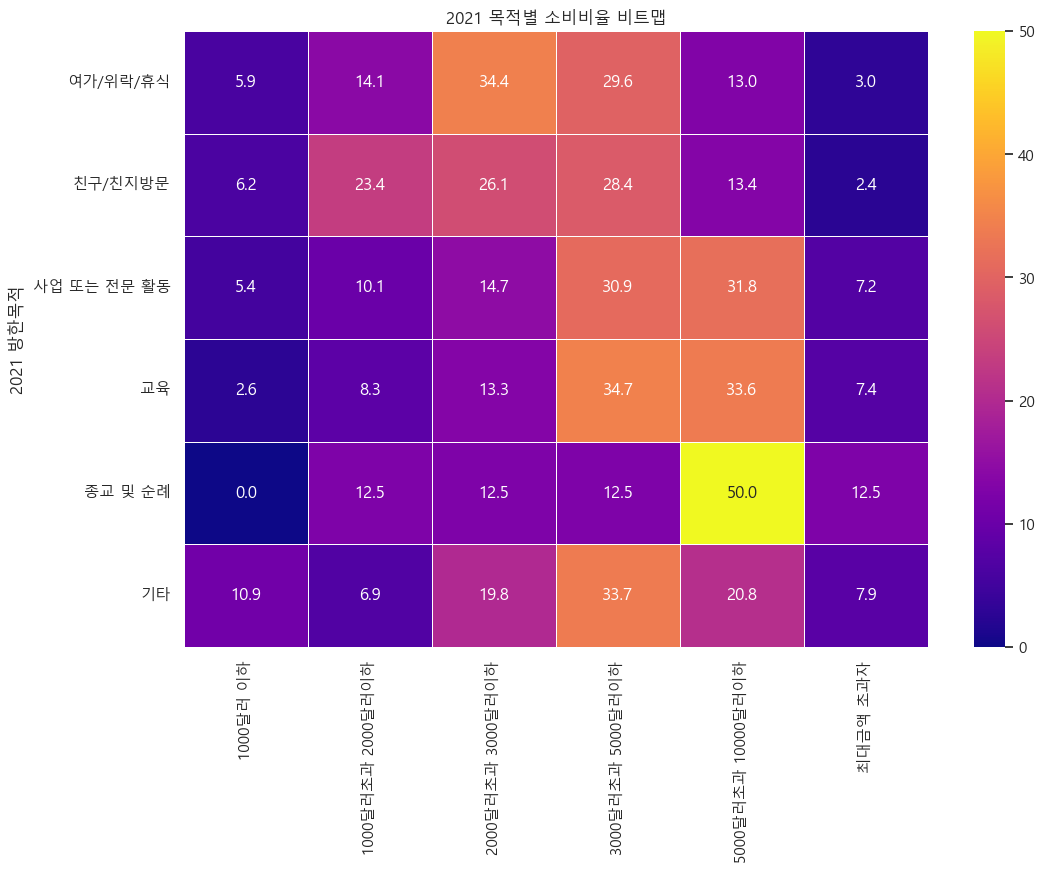

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_trip_obj2021,annot=True, cmap='plasma', fmt='.1f', linewidths=.5)
plt.title('2021 목적별 소비비율 비트맵')
plt.show()

In [50]:
df_trip_obj = df_trip.iloc[46:52,:]
df_trip_obj  = df_trip_obj .drop(columns=['통계분류(1)'], axis=1)
df_trip_obj  = df_trip_obj .rename(columns={'통계분류(2)': '2022 방한목적'})
df_trip_obj  = df_trip_obj .set_index('2022 방한목적')
df_trip_obj2022  = df_trip_obj .iloc[:, 8:]
df_trip_obj2022 = df_trip_obj2022.astype('float')
df_trip_obj2022 = df_trip_obj2022.iloc[0:,1:7]
df_trip_obj2022

,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자
2022 방한목적,,,,,,
여가/위락/휴식,16.2,30.6,26.4,18.9,6.1,1.7
친구/친지방문,11.4,25.3,28.5,25.9,7.5,1.4
사업 또는 전문 활동,5.8,16.7,22.1,29.6,21.0,4.9
교육,3.8,11.3,18.1,32.4,28.2,6.3
종교 및 순례,6.5,16.1,29.0,25.8,22.6,0.0
기타,5.5,30.6,27.7,20.2,8.1,7.9


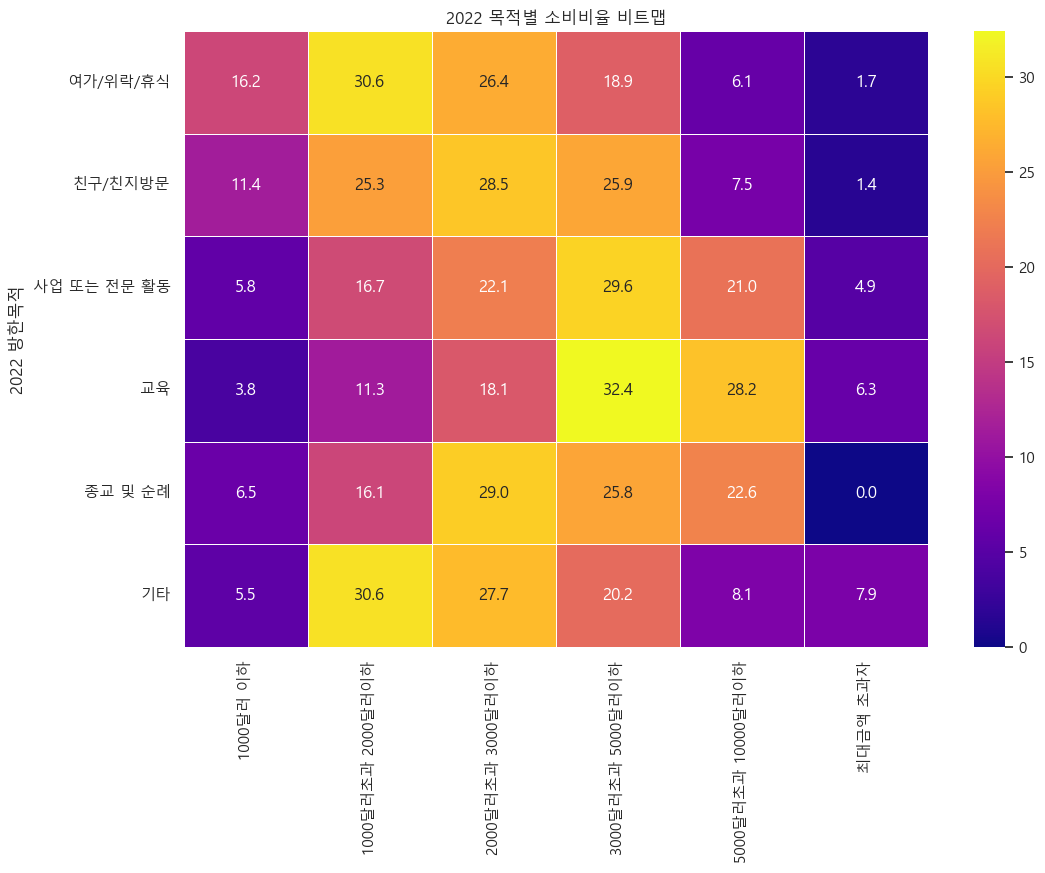

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_trip_obj2022,annot=True, cmap='plasma', fmt='.1f', linewidths=.5)
plt.title('2022 목적별 소비비율 비트맵')
plt.show()

In [52]:
df_m = pd.read_csv('pur_fin222.csv')
df_m['년월'] = pd.to_datetime(df_m['년월'], format='%Y%m')
#check_df = check_df[check_df['년월'] == '2022']
df_m = df_m[(df_m['년월'] >= '2021-01-01') & (df_m['년월'] <= '2021-12-31')]

df_obj = df_m.drop(columns=['연령', '성별', '국적','지역','입국항','교통수단','전년동기','증감률'], axis=1)
df_obj2021 = df_obj.groupby('목적', as_index=False)['인원'].agg('sum')
df_obj2021=df_obj2021.set_index('목적')
df_obj2021

,인원
목적,
공용,18685.0
관광,211846.0
기타,635098.0
상용,21290.0
유학연수,80084.0


In [53]:
df_trip_obj = df_trip.iloc[46:52,:]
df_trip_obj  = df_trip_obj .drop(columns=['통계분류(1)'], axis=1)
df_trip_obj  = df_trip_obj .rename(columns={'통계분류(2)': '목적'})
df_trip_obj  = df_trip_obj .set_index('목적')
df_trip_obj2021_r  = df_trip_obj .iloc[:, :8]
df_trip_obj2021_r = df_trip_obj2021_r.astype('float')
df_trip_obj2021_r = df_trip_obj2021_r.iloc[0:,0:7]
df_trip_obj2021_r

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자
목적,,,,,,,
여가/위락/휴식,270.0,5.9,14.1,34.4,29.6,13.0,3.0
친구/친지방문,658.0,6.2,23.4,26.1,28.4,13.4,2.4
사업 또는 전문 활동,2481.0,5.4,10.1,14.7,30.9,31.8,7.2
교육,458.0,2.6,8.3,13.3,34.7,33.6,7.4
종교 및 순례,8.0,0.0,12.5,12.5,12.5,50.0,12.5
기타,101.0,10.9,6.9,19.8,33.7,20.8,7.9


In [54]:
df_trip_obj2021_r

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자
목적,,,,,,,
여가/위락/휴식,270.0,5.9,14.1,34.4,29.6,13.0,3.0
친구/친지방문,658.0,6.2,23.4,26.1,28.4,13.4,2.4
사업 또는 전문 활동,2481.0,5.4,10.1,14.7,30.9,31.8,7.2
교육,458.0,2.6,8.3,13.3,34.7,33.6,7.4
종교 및 순례,8.0,0.0,12.5,12.5,12.5,50.0,12.5
기타,101.0,10.9,6.9,19.8,33.7,20.8,7.9


In [55]:
여가_비중 = 270/(270+658)
친구_비중 = 658/(270+658)
사업_비중 = 1
교육_비중 = 1
종교_비중 = 8/(8+101) 
기타_비중 = 101/(8+101)

df_trip_obj2021_r['비중'] = [여가_비중, 친구_비중, 사업_비중,교육_비중, 종교_비중, 기타_비중]
df_trip_obj2021_r

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,비중
목적,,,,,,,,
여가/위락/휴식,270.0,5.9,14.1,34.4,29.6,13.0,3.0,0.290948
친구/친지방문,658.0,6.2,23.4,26.1,28.4,13.4,2.4,0.709052
사업 또는 전문 활동,2481.0,5.4,10.1,14.7,30.9,31.8,7.2,1.000000
교육,458.0,2.6,8.3,13.3,34.7,33.6,7.4,1.000000
종교 및 순례,8.0,0.0,12.5,12.5,12.5,50.0,12.5,0.073394
기타,101.0,10.9,6.9,19.8,33.7,20.8,7.9,0.926606


In [56]:
for i in range(len(df_obj2021)):

    if i == 0:
        df_trip_obj2021_r.iloc[2,1:7] = (df_obj2021.iloc[i,0] +  df_obj2021.iloc[3,0]) * df_trip_obj2021_r.iloc[2,1:7] * df_trip_obj2021_r.iloc[2,7]
        
    elif i == 1:
        
        df_trip_obj2021_r.iloc[0,1:7] = df_obj2021.iloc[i,0] * df_trip_obj2021_r.iloc[0,1:7] * df_trip_obj2021_r.iloc[0,7]
        df_trip_obj2021_r.iloc[1,1:7] = df_obj2021.iloc[i,0] * df_trip_obj2021_r.iloc[1,1:7] * df_trip_obj2021_r.iloc[1,7]
   

    elif i ==2:
        df_trip_obj2021_r.iloc[4,1:7] = df_obj2021.iloc[i,0] * df_trip_obj2021_r.iloc[4,1:7] * df_trip_obj2021_r.iloc[4,7]
        df_trip_obj2021_r.iloc[5,1:7] = df_obj2021.iloc[i,0] * df_trip_obj2021_r.iloc[5,1:7] * df_trip_obj2021_r.iloc[5,7]

    elif i == 3:
        pass
    elif i == 4:
        df_trip_obj2021_r.iloc[3,1:7] = df_obj2021.iloc[i,0] * df_trip_obj2021_r.iloc[3,1:7] * df_trip_obj2021_r.iloc[3,7]


    i=i+1
    
df_trip_obj2021_r

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,비중
목적,,,,,,,,
여가/위락/휴식,270.0,3.636537e+05,8.690708e+05,2.120286e+06,1.824432e+06,8.012710e+05,1.849087e+05,0.290948
친구/친지방문,658.0,9.313006e+05,3.514909e+06,3.920475e+06,4.265958e+06,2.012811e+06,3.605035e+05,0.709052
사업 또는 전문 활동,2481.0,2.158650e+05,4.037475e+05,5.876325e+05,1.235228e+06,1.271205e+06,2.878200e+05,1.000000
교육,458.0,2.082184e+05,6.646972e+05,1.065117e+06,2.778915e+06,2.690822e+06,5.926216e+05,1.000000
종교 및 순례,8.0,0.000000e+00,5.826587e+05,5.826587e+05,5.826587e+05,2.330635e+06,5.826587e+05,0.073394
기타,101.0,6.414490e+06,4.060549e+06,1.165201e+07,1.983195e+07,1.224049e+07,4.649034e+06,0.926606


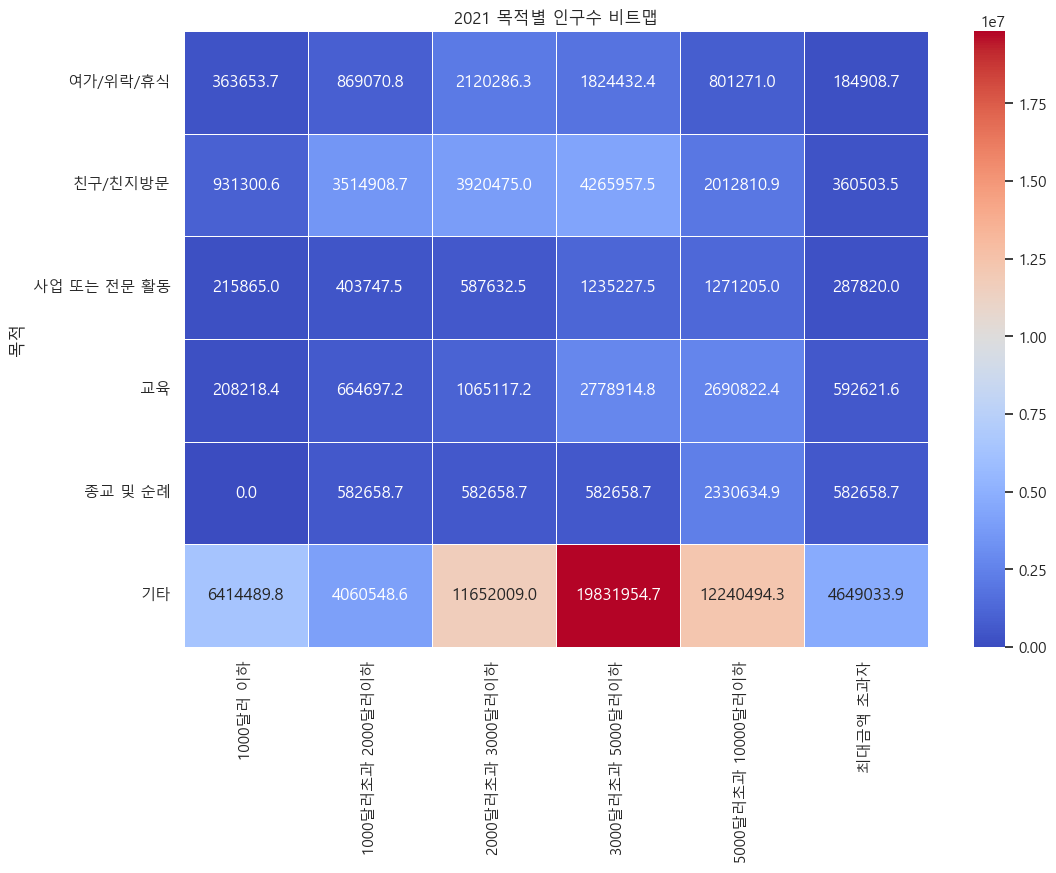

In [57]:
df_trip_obj2021_pop = df_trip_obj2021_r.drop(columns=['사례수', '비중'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_trip_obj2021_pop,annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('2021 목적별 인구수 비트맵')
plt.show()

In [58]:
check_df = pd.read_csv('pur_fin222.csv')
check_df['년월'] = pd.to_datetime(check_df['년월'], format='%Y%m')
#check_df = check_df[check_df['년월'] == '2022']
check_df = check_df[(check_df['년월'] >= '2022-01-01') & (check_df['년월'] <= '2022-12-31')]

check_df_obj = check_df.drop(columns=['연령', '성별', '국적','지역','입국항','교통수단','전년동기','증감률'], axis=1)
check_df_obj_2022 = check_df_obj.groupby('목적', as_index=False)['인원'].agg('sum')
check_df_obj_2022=check_df_obj_2022.set_index('목적')
check_df_obj_2022

,인원
목적,
공용,35692.0
관광,1998937.0
기타,939023.0
상용,72170.0
유학연수,152195.0


In [59]:
df_trip_obj = df_trip.iloc[46:52,:]
df_trip_obj  = df_trip_obj .drop(columns=['통계분류(1)'], axis=1)
df_trip_obj  = df_trip_obj .rename(columns={'통계분류(2)': '2022 방한목적'})
df_trip_obj  = df_trip_obj .set_index('2022 방한목적')
df_trip_obj2022r  = df_trip_obj .iloc[:, 8:]
df_trip_obj2022r = df_trip_obj2022r.astype('float')
df_trip_obj2022r = df_trip_obj2022r.iloc[0:,0:7]
df_trip_obj2022r

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자
2022 방한목적,,,,,,,
여가/위락/휴식,7256.0,16.2,30.6,26.4,18.9,6.1,1.7
친구/친지방문,2332.0,11.4,25.3,28.5,25.9,7.5,1.4
사업 또는 전문 활동,5699.0,5.8,16.7,22.1,29.6,21.0,4.9
교육,825.0,3.8,11.3,18.1,32.4,28.2,6.3
종교 및 순례,31.0,6.5,16.1,29.0,25.8,22.6,0.0
기타,382.0,5.5,30.6,27.7,20.2,8.1,7.9


In [60]:
for i in range(len(df_trip_obj2022r)):
    
    if i == 0:
        df_trip_obj2022r['비중'] = [0,0,0,0,0,0]
        df_trip_obj2022r.iloc[0,7] = df_trip_obj2022r.iloc[i,0] / (  df_trip_obj2022r.iloc[0,0] + df_trip_obj2022r.iloc[1,0]    )
    elif i == 1:    
        df_trip_obj2022r.iloc[1,7] = df_trip_obj2022r.iloc[i,0]  / (  df_trip_obj2022r.iloc[0,0] + df_trip_obj2022r.iloc[1,0]    )
    elif i == 2:
        df_trip_obj2022r.iloc[2,7] = 1
    elif i == 3:
        df_trip_obj2022r.iloc[3,7] = 1
    elif i == 4:
        df_trip_obj2022r.iloc[4,7] = df_trip_obj2022r.iloc[i,0]  / (  df_trip_obj2022r.iloc[4,0] + df_trip_obj2022r.iloc[5,0]    )
    elif i == 5:
        df_trip_obj2022r.iloc[5,7] = df_trip_obj2022r.iloc[i,0]  / (  df_trip_obj2022r.iloc[4,0] + df_trip_obj2022r.iloc[5,0]    )
    i=i+1
df_trip_obj2022r


C:\Users\admin\AppData\Local\Temp\ipykernel_13300\819756015.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.756779307467668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_trip_obj2022r.iloc[0,7] = df_trip_obj2022r.iloc[i,0] / (  df_trip_obj2022r.iloc[0,0] + df_trip_obj2022r.iloc[1,0]    )


,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,비중
2022 방한목적,,,,,,,,
여가/위락/휴식,7256.0,16.2,30.6,26.4,18.9,6.1,1.7,0.756779
친구/친지방문,2332.0,11.4,25.3,28.5,25.9,7.5,1.4,0.243221
사업 또는 전문 활동,5699.0,5.8,16.7,22.1,29.6,21.0,4.9,1.000000
교육,825.0,3.8,11.3,18.1,32.4,28.2,6.3,1.000000
종교 및 순례,31.0,6.5,16.1,29.0,25.8,22.6,0.0,0.075061
기타,382.0,5.5,30.6,27.7,20.2,8.1,7.9,0.924939


In [61]:
for i in range(len(check_df_obj_2022)):

    if i == 0:
        df_trip_obj2022r.iloc[2,1:7] = (check_df_obj_2022.iloc[i,0] +  check_df_obj_2022.iloc[3,0]) * df_trip_obj2022r.iloc[2,1:7] * df_trip_obj2022r.iloc[2,7]
        
    elif i == 1:
        
        df_trip_obj2022r.iloc[0,1:7] = check_df_obj_2022.iloc[i,0] * df_trip_obj2022r.iloc[0,1:7] * df_trip_obj2022r.iloc[0,7]
        df_trip_obj2022r.iloc[1,1:7] = check_df_obj_2022.iloc[i,0] * df_trip_obj2022r.iloc[1,1:7] * df_trip_obj2022r.iloc[1,7]
   

    elif i ==2:
        df_trip_obj2022r.iloc[4,1:7] = check_df_obj_2022.iloc[i,0] * df_trip_obj2022r.iloc[4,1:7] * df_trip_obj2022r.iloc[4,7]
        df_trip_obj2022r.iloc[5,1:7] = check_df_obj_2022.iloc[i,0] * df_trip_obj2022r.iloc[5,1:7] * df_trip_obj2022r.iloc[5,7]

    elif i == 3:
        pass
    elif i == 4:
        df_trip_obj2022r.iloc[3,1:7] = check_df_obj_2022.iloc[i,0] * df_trip_obj2022r.iloc[3,1:7] * df_trip_obj2022r.iloc[3,7]


    i=i+1
    
df_trip_obj2022r

,사례수,1000달러 이하,1000달러초과 2000달러이하,2000달러초과 3000달러이하,3000달러초과 5000달러이하,5000달러초과 10000달러이하,최대금액 초과자,비중
2022 방한목적,,,,,,,,
여가/위락/휴식,7256.0,2.450662e+07,4.629028e+07,3.993671e+07,2.859105e+07,9.227800e+06,2.571682e+06,0.756779
친구/친지방문,2332.0,5.542484e+06,1.230043e+07,1.385621e+07,1.259214e+07,3.646371e+06,6.806560e+05,0.243221
사업 또는 전문 활동,5699.0,6.255996e+05,1.801295e+06,2.383750e+06,3.192715e+06,2.265102e+06,5.285238e+05,1.000000
교육,825.0,5.783410e+05,1.719804e+06,2.754730e+06,4.931118e+06,4.291899e+06,9.588285e+05,1.000000
종교 및 순례,31.0,4.581432e+05,1.134785e+06,2.044023e+06,1.818476e+06,1.592929e+06,0.000000e+00,0.075061
기타,382.0,4.776967e+06,2.657731e+07,2.405854e+07,1.754450e+07,7.035169e+06,6.861462e+06,0.924939


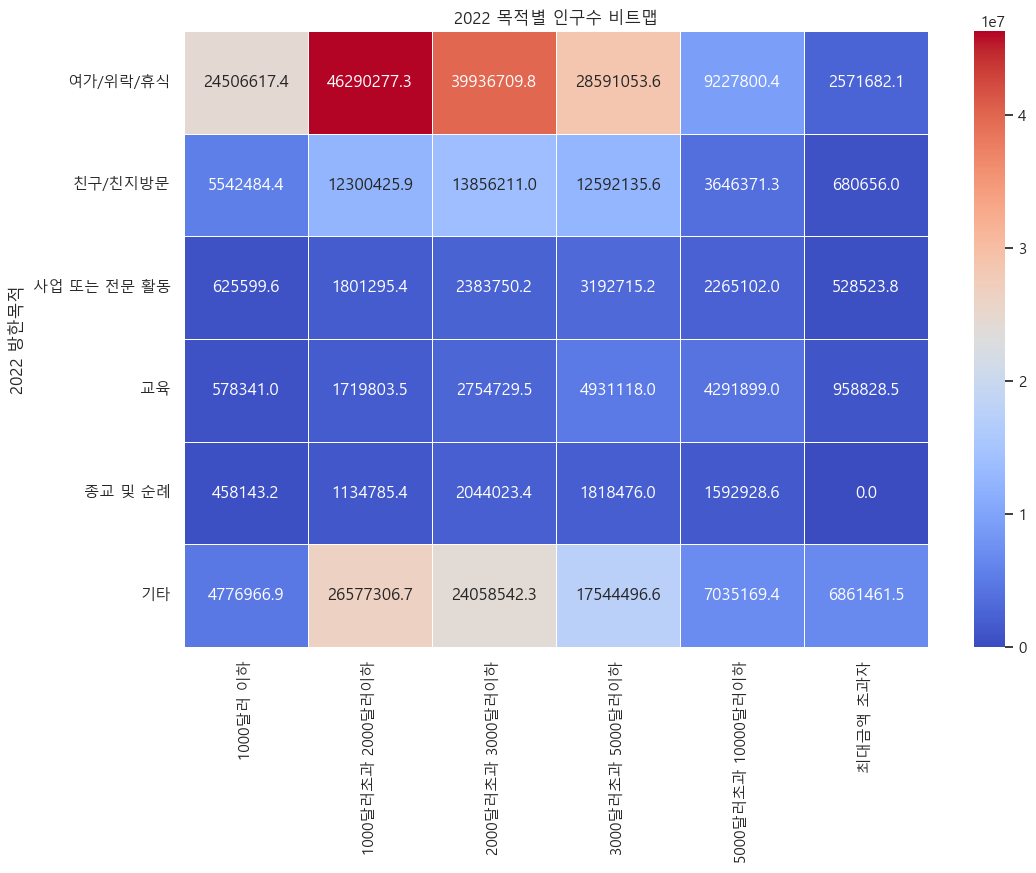

In [62]:
df_trip_obj2022r_pop = df_trip_obj2022r.drop(columns=['사례수', '비중'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_trip_obj2022r_pop,annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('2022 목적별 인구수 비트맵')
plt.show()

# ??


In [63]:
df_orig = pd.read_csv('코로나1.csv', encoding='cp949')


In [64]:
df_orig = df_orig[df_orig['국가별'].isin(['중국', '일본', '대만', '미국'])]
df_orig = df_orig.drop(columns=['Unnamed: 804','단위'], axis=1)
df_orig

,국가별,항목,2020.05.01,2020.05.02,2020.05.03,2020.05.04,2020.05.05,2020.05.06,2020.05.07,2020.05.08,...,2023.02.02,2023.02.08,2023.02.15,2023.02.22,2023.03.02,2023.03.08,2023.03.16,2023.03.22,2023.03.30,2023.04.06
2,중국,확진자수[명],82874,82875,82877,82880,82881,82883,82885,82886,...,98527673,98677876,98815992,98932687,98932687,99109603,99185059,99229372,99238143,99238586
3,중국,사망자수[명],4633,4633,4633,4633,4633,4633,4633,4633,...,111621,117634,118984,119510,119510,120227,120576,120775,120894,120896
10,일본,확진자수[명],14281,14545,14839,15057,15231,15354,15463,15547,...,32532905,32760317,32958774,33097952,33097952,33264491,33336977,33374303,33421785,33469149
11,일본,사망자수[명],432,458,492,510,521,543,551,557,...,68091,69601,70788,71737,71737,72805,73273,73511,73747,73953
24,대만,확진자수[명],429,429,432,432,438,438,439,440,...,9537823,9537823,9821755,9954456,9954456,9970937,9970937,9970937,9970937,9970937
25,대만,사망자수[명],6,6,6,6,6,6,6,6,...,16308,16308,17157,17608,17608,17672,17672,17672,17672,17672
34,미국,확진자수[명],1067289,1100197,1130115,1157687,1177784,1203502,1223468,1254740,...,100941827,101211478,101496168,101752396,101752396,102247392,102417985,102544598,102697566,102873924
35,미국,사망자수[명],62870,64600,66224,67674,68689,71022,73039,75543,...,1097246,1100421,1103936,1106783,1106783,1111342,1113229,1114970,1117054,1118800


In [65]:
df_orig = df_orig.set_index(['국가별', '항목'])
df_orig

2020.05.01  2020.05.02  2020.05.03  2020.05.04  2020.05.05  \
국가별 항목                                                                    
중국  확진자수[명]       82874       82875       82877       82880       82881   
    사망자수[명]        4633        4633        4633        4633        4633   
일본  확진자수[명]       14281       14545       14839       15057       15231   
    사망자수[명]         432         458         492         510         521   
대만  확진자수[명]         429         429         432         432         438   
    사망자수[명]           6           6           6           6           6   
미국  확진자수[명]     1067289     1100197     1130115     1157687     1177784   
    사망자수[명]       62870       64600       66224       67674       68689   

             2020.05.06  2020.05.07  2020.05.08  2020.05.09  2020.05.10  ...  \
국가별 항목                                                                   ...   
중국  확진자수[명]       82883       82885       82886       82887       82901  ...   
    사망자수[명]        4633        4633        4633        4633        4633  ...   
일본  확진자수[명]       15354       15463       15547       15628       15747  ...   
    사망자수[명]         543         551         557         601         613  ...   
대만  확진자수[명]         438         439         440         440         440  ...   
    사망자수[명]           6           6           6           6           6  ...   
미국  확진자수[명]     1203502     1223468     1254740     1283829     1307676  ...   
    사망자수[명]       71022       73039       75543       77178       78693  ...   

             2023.02.02  2023.02.08  2023.02.15  2023.02.22  2023.03.02  \
국가별 항목                                                                    
중국  확진자수[명]    98527673    98677876    98815992    98932687    98932687   
    사망자수[명]      111621      117634      118984      119510      119510   
일본  확진자수[명]    32532905    32760317    32958774    33097952    33097952   
    사망자수[명]       68091       69601       70788       71737       71737   
대만  확진자수[명]     9537823     9537823     9821755     9954456     9954456   
    사망자수[명]       16308       16308       17157       17608       17608   
미국  확진자수[명]   100941827   101211478   101496168   101752396   101752396   
    사망자수[명]     1097246     1100421     1103936     1106783     1106783   

             2023.03.08  2023.03.16  2023.03.22  2023.03.30  2023.04.06  
국가별 항목                                                                   
중국  확진자수[명]    99109603    99185059    99229372    99238143    99238586  
    사망자수[명]      120227      120576      120775      120894      120896  
일본  확진자수[명]    33264491    33336977    33374303    33421785    33469149  
    사망자수[명]       72805       73273       73511       73747       73953  
대만  확진자수[명]     9970937     9970937     9970937     9970937     9970937  
    사망자수[명]       17672       17672       17672       17672       17672  
미국  확진자수[명]   102247392   102417985   102544598   102697566   102873924  
    사망자수[명]     1111342     1113229     1114970     1117054     1118800  

[8 rows x 801 columns]

In [66]:
df_orig = df_orig.transpose()
df_orig

국가별                 중국                    일본                  대만           \
항목             확진자수[명]   사망자수[명]     확진자수[명]  사망자수[명]    확진자수[명]  사망자수[명]   
2020.05.01     82874.0    4633.0     14281.0    432.0      429.0      6.0   
2020.05.02     82875.0    4633.0     14545.0    458.0      429.0      6.0   
2020.05.03     82877.0    4633.0     14839.0    492.0      432.0      6.0   
2020.05.04     82880.0    4633.0     15057.0    510.0      432.0      6.0   
2020.05.05     82881.0    4633.0     15231.0    521.0      438.0      6.0   
...                ...       ...         ...      ...        ...      ...   
2023.03.08  99109603.0  120227.0  33264491.0  72805.0  9970937.0  17672.0   
2023.03.16  99185059.0  120576.0  33336977.0  73273.0  9970937.0  17672.0   
2023.03.22  99229372.0  120775.0  33374303.0  73511.0  9970937.0  17672.0   
2023.03.30  99238143.0  120894.0  33421785.0  73747.0  9970937.0  17672.0   
2023.04.06  99238586.0  120896.0  33469149.0  73953.0  9970937.0  17672.0   

국가별                  미국             
항목              확진자수[명]    사망자수[명]  
2020.05.01    1067289.0    62870.0  
2020.05.02    1100197.0    64600.0  
2020.05.03    1130115.0    66224.0  
2020.05.04    1157687.0    67674.0  
2020.05.05    1177784.0    68689.0  
...                 ...        ...  
2023.03.08  102247392.0  1111342.0  
2023.03.16  102417985.0  1113229.0  
2023.03.22  102544598.0  1114970.0  
2023.03.30  102697566.0  1117054.0  
2023.04.06  102873924.0  1118800.0  

[801 rows x 8 columns]

In [67]:
df_orig.index = df_orig.index.astype('datetime64[ns]')

In [68]:
df_orig = df_orig- df_orig.shift(1) 
df_orig
#df_orig/df_orig.shift(1)

국가별               중국                일본               대만                미국  \
항목           확진자수[명] 사망자수[명]   확진자수[명] 사망자수[명]  확진자수[명] 사망자수[명]   확진자수[명]   
2020-05-01       NaN     NaN       NaN     NaN      NaN     NaN       NaN   
2020-05-02       1.0     0.0     264.0    26.0      0.0     0.0   32908.0   
2020-05-03       2.0     0.0     294.0    34.0      3.0     0.0   29918.0   
2020-05-04       3.0     0.0     218.0    18.0      0.0     0.0   27572.0   
2020-05-05       1.0     0.0     174.0    11.0      6.0     0.0   20097.0   
...              ...     ...       ...     ...      ...     ...       ...   
2023-03-08  176916.0   717.0  166539.0  1068.0  16481.0    64.0  494996.0   
2023-03-16   75456.0   349.0   72486.0   468.0      0.0     0.0  170593.0   
2023-03-22   44313.0   199.0   37326.0   238.0      0.0     0.0  126613.0   
2023-03-30    8771.0   119.0   47482.0   236.0      0.0     0.0  152968.0   
2023-04-06     443.0     2.0   47364.0   206.0      0.0     0.0  176358.0   

국가별                 
항목         사망자수[명]  
2020-05-01     NaN  
2020-05-02  1730.0  
2020-05-03  1624.0  
2020-05-04  1450.0  
2020-05-05  1015.0  
...            ...  
2023-03-08  4559.0  
2023-03-16  1887.0  
2023-03-22  1741.0  
2023-03-30  2084.0  
2023-04-06  1746.0  

[801 rows x 8 columns]

In [69]:
covid_df = pd.read_csv('covid_fin_mean(2).csv')
covid_df= covid_df.drop(columns='Unnamed: 0',axis=1)
covid_df

,국적,년월,확진자수,사망자수
0,대만,2020-05,0.0,0.0
1,대만,2020-06,6.0,0.0
2,대만,2020-07,9.0,0.0
3,대만,2020-08,28.0,0.0
4,대만,2020-09,18.0,0.0
...,...,...,...,...
676,홍콩,2022-12,296440.0,538.0
677,홍콩,2023-01,494599.0,1544.0
678,홍콩,2023-02,88252.0,713.0
679,홍콩,2023-03,0.0,0.0


# Kmean 클러스터 model


In [125]:
m_df = pd.read_csv('pur_fin222.csv')
m_df['년월'] = pd.to_datetime(m_df['년월'], format='%Y%m')
#check_df = check_df[check_df['년월'] == '2022']
m_df = m_df[(m_df['년월'] >= '2022-01-01') & (m_df['년월'] <= '2022-12-31')]
m_cluster = m_df.drop(columns=['연령', '성별','입국항','교통수단','전년동기','증감률'], axis=1)
m_cluster=m_cluster.drop(['년월'], axis=1)
m_cluster

,목적,국적,지역,인원
54515,관광,중국,아시아,1641.0
54516,상용,중국,아시아,170.0
54517,공용,중국,아시아,8.0
54518,유학연수,중국,아시아,264.0
54519,기타,중국,아시아,7406.0
...,...,...,...,...
58110,관광,교포,교포,0.0
58111,상용,교포,교포,0.0
58112,공용,교포,교포,0.0
58113,유학연수,교포,교포,0.0


In [126]:
m_cluster= pd.get_dummies(m_cluster, columns=['목적', '국적', '지역'])
m_cluster=m_cluster.astype('int')
m_cluster

,인원,목적_공용,목적_관광,목적_기타,목적_상용,목적_유학연수,국적_GCC,국적_교포,국적_그리스,국적_기타,...,국적_필리핀,국적_호주,국적_홍콩,지역_교포,지역_기타,지역_아메리카,지역_아시아,지역_아프리카,지역_오세아니아,지역_유럽
54515,1641,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54516,170,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54517,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54518,264,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54519,7406,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58110,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
58111,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
58112,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
58113,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [127]:
m_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 54515 to 58114
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   인원           3600 non-null   int32
 1   목적_공용        3600 non-null   int32
 2   목적_관광        3600 non-null   int32
 3   목적_기타        3600 non-null   int32
 4   목적_상용        3600 non-null   int32
 5   목적_유학연수      3600 non-null   int32
 6   국적_GCC       3600 non-null   int32
 7   국적_교포        3600 non-null   int32
 8   국적_그리스       3600 non-null   int32
 9   국적_기타        3600 non-null   int32
 10  국적_남아프리카공화국  3600 non-null   int32
 11  국적_네덜란드      3600 non-null   int32
 12  국적_노르웨이      3600 non-null   int32
 13  국적_뉴질랜드      3600 non-null   int32
 14  국적_대만        3600 non-null   int32
 15  국적_덴마크       3600 non-null   int32
 16  국적_독일        3600 non-null   int32
 17  국적_러시아       3600 non-null   int32
 18  국적_루마니아      3600 non-null   int32
 19  국적_마카오       3600 non-null   int32
 20  국적_말레이시아

In [130]:
from sklearn.preprocessing import StandardScaler


columns_to_standardize = ['인원'] 


scaler = StandardScaler()


m_cluster[columns_to_standardize] = scaler.fit_transform(m_cluster[columns_to_standardize])


,인원,목적_공용,목적_관광,목적_기타,목적_상용,목적_유학연수,국적_GCC,국적_교포,국적_그리스,국적_기타,...,국적_필리핀,국적_호주,국적_홍콩,지역_교포,지역_기타,지역_아메리카,지역_아시아,지역_아프리카,지역_오세아니아,지역_유럽
54515,0.201662,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54516,-0.192465,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54517,-0.235870,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54518,-0.167280,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54519,1.746284,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58110,-0.238013,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
58111,-0.238013,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
58112,-0.238013,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
58113,-0.238013,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [135]:
m_cluster.columns

Index(['인원', '목적_공용', '목적_관광', '목적_기타', '목적_상용', '목적_유학연수', '국적_GCC', '국적_교포',
       '국적_그리스', '국적_기타', '국적_남아프리카공화국', '국적_네덜란드', '국적_노르웨이', '국적_뉴질랜드',
       '국적_대만', '국적_덴마크', '국적_독일', '국적_러시아', '국적_루마니아', '국적_마카오', '국적_말레이시아',
       '국적_멕시코', '국적_몽골', '국적_미국', '국적_미얀마', '국적_방글라데시', '국적_베트남', '국적_벨기에',
       '국적_불가리아', '국적_브라질', '국적_스리랑카', '국적_스웨덴', '국적_스위스', '국적_스페인', '국적_싱가포르',
       '국적_아일랜드', '국적_영국', '국적_오스트리아', '국적_우즈베키스탄', '국적_우크라이나', '국적_이란',
       '국적_이스라엘', '국적_이탈리아', '국적_인도', '국적_인도네시아', '국적_일본', '국적_중국', '국적_카자흐스탄',
       '국적_캄보디아', '국적_캐나다', '국적_크로아티아', '국적_태국', '국적_튀르키예', '국적_파키스탄',
       '국적_포르투갈', '국적_폴란드', '국적_프랑스', '국적_핀란드', '국적_필리핀', '국적_호주', '국적_홍콩',
       '지역_교포', '지역_기타', '지역_아메리카', '지역_아시아', '지역_아프리카', '지역_오세아니아', '지역_유럽',
       'cluster'],
      dtype='object')

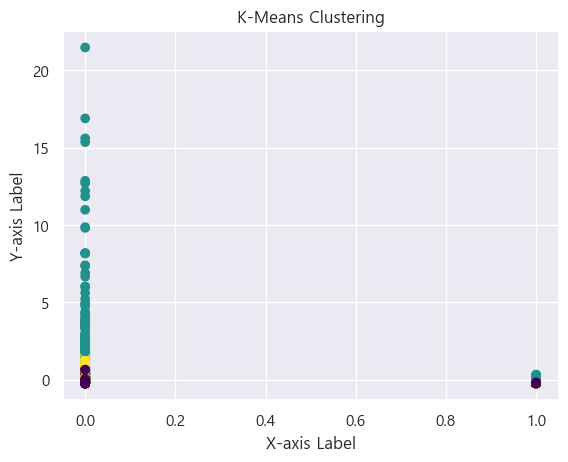

In [143]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

label= ['인원', '목적_공용', '목적_관광', '목적_기타', '목적_상용', '목적_유학연수', '국적_GCC', '국적_교포',
       '국적_그리스', '국적_기타', '국적_남아프리카공화국', '국적_네덜란드', '국적_노르웨이', '국적_뉴질랜드',
       '국적_대만', '국적_덴마크', '국적_독일', '국적_러시아', '국적_루마니아', '국적_마카오', '국적_말레이시아',
       '국적_멕시코', '국적_몽골', '국적_미국', '국적_미얀마', '국적_방글라데시', '국적_베트남', '국적_벨기에',
       '국적_불가리아', '국적_브라질', '국적_스리랑카', '국적_스웨덴', '국적_스위스', '국적_스페인', '국적_싱가포르',
       '국적_아일랜드', '국적_영국', '국적_오스트리아', '국적_우즈베키스탄', '국적_우크라이나', '국적_이란',
       '국적_이스라엘', '국적_이탈리아', '국적_인도', '국적_인도네시아', '국적_일본', '국적_중국', '국적_카자흐스탄',
       '국적_캄보디아', '국적_캐나다', '국적_크로아티아', '국적_태국', '국적_튀르키예', '국적_파키스탄',
       '국적_포르투갈', '국적_폴란드', '국적_프랑스', '국적_핀란드', '국적_필리핀', '국적_호주', '국적_홍콩',
       '지역_교포', '지역_기타', '지역_아메리카', '지역_아시아', '지역_아프리카', '지역_오세아니아', '지역_유럽']

n_clusters = 3  

# Fit k-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
m_cluster['cluster'] = kmeans.fit_predict(m_cluster)

# Visualize the clusters
plt.scatter(m_cluster['목적_상용'], m_cluster['인원'], c=m_cluster['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

# linear regression  목적, 인구, 나라와 인구의 상관관계

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

m_df = pd.read_csv('pur_fin222.csv')
m_df['년월'] = pd.to_datetime(m_df['년월'], format='%Y%m')
m_df = m_df[(m_df['년월'] >= '2022-01-01') & (m_df['년월'] <= '2022-12-31')]
lr_df = m_df.drop(columns=['연령', '성별','입국항','교통수단','전년동기','증감률'], axis=1)
lr_df

X = lr_df[['목적', '국적', '지역']]
y = lr_df['인원']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = ['목적', '국적', '지역']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)


lr_model = LinearRegression()


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lr_model)
])


pipeline.fit(X_train, y_train)

yhat = pipeline.predict(X_test)
print(yhat)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f'mean_squared_error value:  {mse}')
print(f'r2 value:  {r2}')

[ 2.10328515e+03 -5.61479005e+02  4.00205667e+02  1.82259550e+03
 -6.22129116e+02  1.84037682e+03  3.07847622e+03  1.98851279e+03
 -9.16122540e+02 -7.42041244e+02 -8.51794231e+02  2.65659471e+03
  3.87273438e+03  1.21583015e+03  2.91045303e+03  4.78267452e+03
 -5.93881449e+02  6.04536117e+03  2.32985310e+03  2.90962191e+03
  3.46564116e+02  1.15804160e+03 -4.21611373e+01 -9.16122540e+02
  1.26237713e+03  4.51479109e+02  1.97666185e+03  3.04151290e+03
 -5.04765108e+02  1.43442165e+03 -6.22129116e+02 -8.96417355e+02
  8.76544654e+02  2.20993239e+02 -3.91615045e+02  2.31825961e+03
  2.65659471e+03  7.24526476e+02 -8.98341218e+02  2.61004773e+03
 -3.21003200e+02  1.34649792e+03  1.84230068e+03  2.63407299e+03
 -4.75735836e+02 -7.17583106e+02 -5.70333870e+02  3.34092996e+03
  4.03364315e+03 -5.54218080e+02 -4.21611373e+01 -7.42041244e+02
  6.65770003e+02  2.03600382e+03 -6.77006076e+02 -8.01703897e+02
  2.65659471e+03  2.76601818e+02  1.34649792e+03 -7.53899300e+02
  7.40403834e+02  6.68805

목적, 국적, 지역은 입국자수와 아무런 관련이 없다.
mean_squared_error value:  8459542.876784718
r2 value:  0.26360397075817965

# sd

In [87]:
m_df = pd.read_csv('pur_fin222.csv')
m_df['년월'] = pd.to_datetime(m_df['년월'], format='%Y%m')

# Filter data for the year 2022
m_df = m_df[(m_df['년월'] >= '2022-01-01') & (m_df['년월'] <= '2022-12-31')]

# Drop unnecessary columns
ar_df = m_df.drop(columns=['연령', '성별', '입국항', '교통수단', '전년동기', '증감률'], axis=1)

# Set '년월' column as an index and drop any rows with NaT in the '년월' column
ar_df = ar_df.set_index('년월').dropna()
ar_df.index = ar_df.index.strftime('%Y-%m')
# Display the DataFrame
ar_df = ar_df.groupby('년월')[['인원']].sum()

<Axes: xlabel='년월', ylabel='인원'>

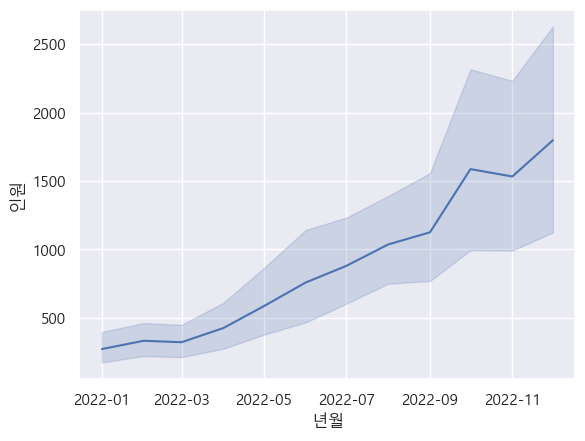

In [82]:
sns.lineplot(ar_df, x='년월', y='인원')

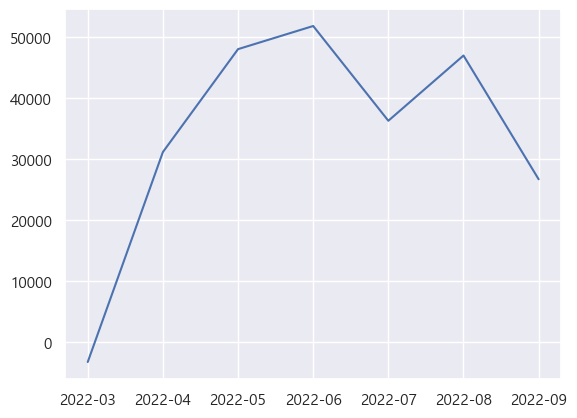

In [99]:
train = ar_df[['인원']].iloc[1:9]

test = ar_df[['인원']].iloc[9:12]

diff1 = train['인원'].diff()
plt.plot(diff1)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


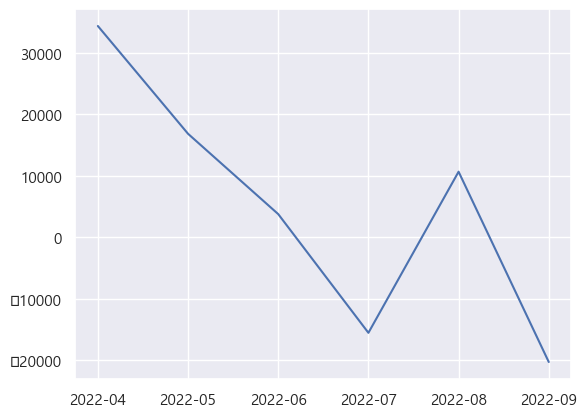

In [100]:
diff2 = diff1.diff()
plt.plot(diff2)

Defaulting to user installation because normal site-packages is not writeable


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

Root Mean Squared Error (RMSE): 159034.64150162632


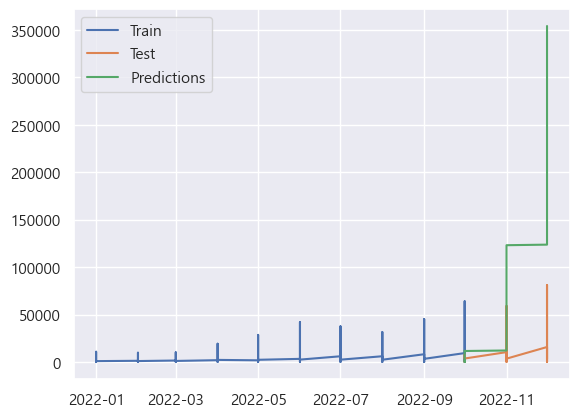

In [79]:
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

m_df = pd.read_csv('pur_fin222.csv')
m_df['년월'] = pd.to_datetime(m_df['년월'], format='%Y%m')

# Filter data for the year 2022
m_df = m_df[(m_df['년월'] >= '2022-01-01') & (m_df['년월'] <= '2022-12-31')]

# Drop unnecessary columns
ar_df = m_df.drop(columns=['연령', '성별', '입국항', '교통수단', '전년동기', '증감률'], axis=1)

ar_df['년월'] = pd.to_datetime(ar_df['년월'], format='%Y-%m-%d')

# Set '년월' as the index
ar_df.set_index('년월', inplace=True)

# Train-test split
train_size = int(len(ar_df) * 0.8)
train, test = ar_df[:train_size], ar_df[train_size:]

# Fit ARIMA model
p, d, q = 10,1,10
model = ARIMA(train['인원'], order=(p, d, q))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
rmse = sqrt(mean_squared_error(test['인원'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.plot(train.index, train['인원'], label='Train')
plt.plot(test.index, test['인원'], label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.show()